### Import Libraries

In [30]:

import sqlite3
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
conn = sqlite3.connect('C:\\Users\\maryam\\Downloads\\Carlo Lisi\\New folder\\database.sqlite')

In [32]:
pd.read_sql(""" SELECT *
                FROM sqlite_master
                WHERE type='table';""",
           conn)

,type,name,tbl_name,rootpage,sql
0,table,Country,Country,2,"CREATE TABLE Country (\n CountryCode TEXT,\..."
1,table,CountryNotes,CountryNotes,186,CREATE TABLE CountryNotes (\n Countrycode T...
2,table,Series,Series,948,"CREATE TABLE Series (\n SeriesCode TEXT,\n ..."
3,table,Indicators,Indicators,4448,CREATE TABLE Indicators (\n CountryName TEX...
4,table,SeriesNotes,SeriesNotes,1317550,CREATE TABLE SeriesNotes (\n Seriescode TEX...
5,table,Footnotes,Footnotes,1317587,CREATE TABLE Footnotes (\n Countrycode TEXT...


### Check the head of data

In [33]:
pd.read_sql("""SELECT *
               FROM Indicators
               LIMIT 3;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579


### Find the number of rows

In [34]:
pd.read_sql("""SELECT COUNT(*)
               FROM Indicators;""",
           conn)

,COUNT(*)
0,5656458


### Check for missing values in one column

In [35]:
pd.read_sql("""SELECT COUNT(*)
               FROM Indicators
               WHERE IndicatorName IS NULL;""",
           conn)

,COUNT(*)
0,0


### Filter not null

In [36]:
pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName IS NOT NULL;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


### Check for missing values in all columns

In [37]:
pd.read_sql("""SELECT COUNT(*) - COUNT(CountryName) AS missing_CountryName,
                      COUNT(*) - COUNT(CountryCode) AS missing_CountryCode,
                      COUNT(*) - COUNT(IndicatorName) AS missing_IndicatorName,
                      COUNT(*) - COUNT(IndicatorCode) AS missing_IndicatorCode, 
                      COUNT(*) - COUNT(Year) AS missing_Year, 
                      COUNT(*) - COUNT(Value) AS missing_Value
                FROM Indicators;""",
           conn)

,missing_CountryName,missing_CountryCode,missing_IndicatorName,missing_IndicatorCode,missing_Year,missing_Value
0,0,0,0,0,0,0


In [38]:
pd.read_sql("""SELECT COUNT (DISTINCT IndicatorName)
                FROM Indicators;""",
           conn)

,COUNT (DISTINCT IndicatorName)
0,1344


### Selecting distinct indicators

In [39]:
pd.read_sql("""SELECT DISTINCT IndicatorName
                FROM Indicators;""",
           conn)

,IndicatorName
0,"2005 PPP conversion factor, GDP (LCU per inter..."
1,"2005 PPP conversion factor, private consumptio..."
2,ARI treatment (% of children under 5 taken to ...
3,Access to electricity (% of population)
4,"Access to electricity, rural (% of rural popul..."
5,"Access to electricity, urban (% of urban popul..."
6,Access to non-solid fuel (% of population)
7,"Access to non-solid fuel, rural (% of rural po..."
8,"Access to non-solid fuel, urban (% of urban po..."
9,Adequacy of social insurance programs (% of to...


### Search for some indicator about GDP

In [40]:
pd.read_sql("""SELECT DISTINCT IndicatorName
               FROM Indicators
               WHERE IndicatorName LIKE 'GDP%';""",
           conn)

,IndicatorName
0,GDP (constant LCU)
1,GDP (current LCU)
2,GDP at market prices (constant 2005 US$)
3,GDP at market prices (current US$)
4,GDP deflator (base year varies by country)
5,GDP growth (annual %)
6,GDP per capita (constant 2005 US$)
7,GDP per capita (constant LCU)
8,GDP per capita (current LCU)
9,GDP per capita (current US$)


In [41]:
pd.read_sql(""" SELECT *
                FROM Indicators
                WHERE IndicatorName ='GDP per capita (current US$)'
                AND CountryName = "Brazil"
                AND Year>=2010;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2010,11124.245780
1,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,13042.421933
2,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,11922.513058
3,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,11711.004405
4,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,11384.415010


### Compare with China

In [42]:
pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND (CountryName= 'Brazil' OR CountryName= 'China')
               AND Year>=2010;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2010,11124.245780
1,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2010,4514.940520
2,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,13042.421933
3,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,5574.187093
4,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,11922.513058
5,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,6264.643878
6,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,11711.004405
7,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,6991.853866
8,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,11384.415010
9,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,7590.016441


### Check the 90's in Brazil

In [43]:
pd.read_sql("""SELECT * 
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND CountryName='Brazil'
               AND Year BETWEEN 1990 AND 1999;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1990,3071.627953
1,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1991,3942.403941
2,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1992,2578.207009
3,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1993,2774.174127
4,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1994,3482.529816
5,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1995,4827.152443
6,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1996,5163.265813
7,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1997,5279.111298
8,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1998,5083.700964
9,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1999,3476.144038


### Check other countries in 2014

In [44]:
pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND CountryName IN ("Brazil", "China", "India")
               AND Year=2014;""",
            conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,11384.415010
1,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,7590.016441
2,India,IND,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1581.510703


### Search for the highest GDP per capita in 2014

In [45]:
pd.read_sql("""SELECT CountryName, MAX (Value)
               FROM Indicators
               WHERE IndicatorName = 'GDP per capita (current US$)'
               AND Year = 2014;""",
            conn)

,CountryName,MAX (Value)
0,Luxembourg,116664.262488


### Order (and reafirm the highest GDP per capita)

In [46]:
pd.read_sql("""SELECT * 
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND Year= 2014
               ORDER BY Value DESC
               LIMIT 3;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,116664.262488
1,Norway,NOR,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,97307.421592
2,Qatar,QAT,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,96732.402545


### Compare the averages

In [47]:
pd.read_sql(""" SELECT CountryName, AVG(Value)
                FROM Indicators
                WHERE IndicatorName= 'GDP per capita (current US$)'
                AND CountryName IN ('Brazil', 'China', 'India', 'Angola')
                AND Year>2010
                GROUP BY CountryName;""",
           conn)

,CountryName,AVG(Value)
0,Angola,5495.348173
1,Brazil,12015.088601
2,China,6605.175319
3,India,1489.484052


### Find the number of measures during this time

In [48]:
pd.read_sql(""" SELECT CountryName, count (*) AS n_measures
                FROM Indicators
                WHERE IndicatorName= 'GDP per capita (current US$)'
                AND CountryName IN ('Brazil', 'China', 'India', 'Angola')
                AND Year>2010
                GROUP BY CountryName
                ORDER BY n_measures
                LIMIT 10;""",
           conn)

,CountryName,n_measures
0,Angola,3
1,Brazil,4
2,China,4
3,India,4


In [49]:
pd.read_sql(""" SELECT *
                FROM Indicators
                WHERE IndicatorName= 'GDP per capita (current US$)'
                AND CountryName = 'Angola'
                AND Year>2010;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,5053.738649
1,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,5531.776299
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,5900.529570


#### Important to know that Angola has less measures during this time

### Make a join to get the information about indicators GDP related measured in 2014 in Brazil

In [50]:
pd.read_sql(""" SELECT Indicators.*, Series.LongDefinition
                FROM Indicators
                LEFT JOIN Series 
                ON Indicators.IndicatorName  = Series.IndicatorName
                WHERE Indicators.IndicatorName LIKE 'GDP%'
                AND CountryName ='Brazil'
                AND Year=2014;""",
            conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,LongDefinition
0,Brazil,BRA,GDP (constant LCU),NY.GDP.MKTP.KN,2014,1.872042e+12,GDP is the sum of gross value added by all res...
1,Brazil,BRA,GDP (current LCU),NY.GDP.MKTP.CN,2014,5.521256e+12,GDP at purchaser's prices is the sum of gross ...
2,Brazil,BRA,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,2014,1.206071e+12,None
3,Brazil,BRA,GDP at market prices (current US$),NY.GDP.MKTP.CD,2014,2.346076e+12,None
4,Brazil,BRA,GDP deflator (base year varies by country),NY.GDP.DEFL.ZS,2014,2.949323e+02,The GDP implicit deflator is the ratio of GDP ...
5,Brazil,BRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,1.447074e-01,Annual percentage growth rate of GDP at market...
6,Brazil,BRA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,5.852500e+03,GDP per capita is gross domestic product divid...
7,Brazil,BRA,GDP per capita (constant LCU),NY.GDP.PCAP.KN,2014,9.084146e+03,GDP per capita is gross domestic product divid...
8,Brazil,BRA,GDP per capita (current LCU),NY.GDP.PCAP.CN,2014,2.679208e+04,GDP per capita is gross domestic product divid...
9,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1.138442e+04,GDP per capita is gross domestic product divid...


In [51]:
df=pd.read_sql(""" SELECT *,
                   CASE WHEN Value < 10000 THEN 'Low'
                   WHEN Value > 80000 THEN 'High'
                   ELSE 'Medium' END AS Category
                   FROM Indicators
                   WHERE IndicatorName='GDP per capita (current US$)'
                   AND Year=2014;""",
              conn)

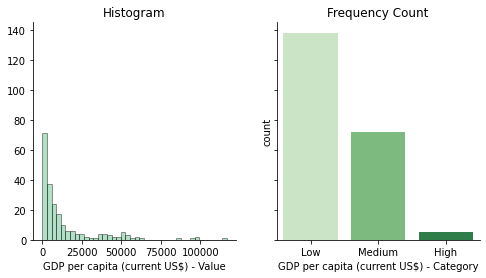

In [52]:
fig, axes= plt.subplots(1,2, figsize=(8,4),sharey=True)

ax1= sns.distplot(df.Value, bins=40, hist_kws={'edgecolor':'k'}, color='mediumseagreen',kde=False,ax=axes[0])
ax1.set_title('Histogram')
ax1.set(xlabel="GDP per capita (current US$) - Value")
ax1= sns.despine()

ax2= sns.countplot(x='Category', data=df, palette="Greens", ax=axes[1])
ax2.set_title('Frequency Count')
ax2.set(xlabel="GDP per capita (current US$) - Category")
ax2= sns.despine();

In [53]:
fig.savefig('eda_sql.png', transparent=True)

### Add the mean of last 3 years using window function

In [54]:
pd.read_sql(""" SELECT *,
                ROUND(AVG(Value) OVER (PARTITION BY CountryCode),0) AS AVG_3Y
                FROM Indicators
                WHERE IndicatorName='GDP per capita (current US$)'
                AND Year IN (2012,2013,2014);""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,AVG_3Y
0,Andorra,ADO,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,39666.369215,41236.0
1,Andorra,ADO,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,42806.522553,41236.0
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,690.842629,664.0
3,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,666.795051,664.0
4,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,633.569247,664.0
5,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,5531.776299,5716.0
6,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,5900.529570,5716.0
7,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,4247.485437,4408.0
8,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,4411.258241,4408.0
9,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,4564.390339,4408.0


### Show the first place from each year

In [55]:
pd.read_sql(""" WITH GDP_3 AS 
                (SELECT *,
                RANK () OVER (PARTITION BY Year ORDER BY Value DESC) AS myrank
                FROM Indicators
                WHERE IndicatorName='GDP per capita (current US$)'
                AND Year IN (2012,2013,2014))
                
                SELECT *
                FROM GDP_3
                WHERE myrank = 1;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,myrank
0,Liechtenstein,LIE,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,149160.758132,1
1,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,113726.638979,1
2,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,116664.262488,1
